### Name : Berchmans Kevin S


## `PDL CNN and RNN`

In [1]:
# Necessary Packages

import numpy as np 
import pandas as pd
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, Flatten
from keras.layers import Embedding, SimpleRNN,LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2mscdsa07\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# `Model - RNN`

In [3]:
df = pd.read_csv("Train.csv")

In [4]:
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [5]:
df.shape

(40000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [7]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
x = df['text']
y = df['label']

In [9]:
y.value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ly= le.fit(y)

In [11]:
Y = le.fit_transform(y)

In [12]:
Y

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [13]:
# Splitting

X_train,X_test, y_train, y_test = train_test_split(x,Y,test_size=0.2,random_state=42)
X_train

14307    I watched it last night and again this morning...
17812    although i liked this Western,i do have to say...
11020    I sat down to watch a documentary about Puerto...
15158    This was probably intended as an "arty" crime ...
24990    The summary provided by my cable TV guide made...
                               ...                        
6265     This movie is one of the worst movie i have ev...
11284    This movie is inspiring to anyone who is or ha...
38158    "East Side Story" is a documentary of musical ...
860      And a self-admitted one to boot. At one point ...
15795    This movie had horrible lighting and terrible ...
Name: text, Length: 32000, dtype: object

In [14]:
# Preprocessing

train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:20])

{'<oov>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'movie': 16,
 'for': 17,
 'with': 18,
 'but': 19,
 'film': 20}

In [15]:
vocab = len(train_token.word_index) + 1
vocab

101437

In [16]:
train_sequence[25]

[15,
 33,
 1,
 1,
 5,
 2,
 1,
 5,
 1,
 11,
 67,
 6,
 1,
 1,
 6,
 1,
 64,
 12,
 20,
 52,
 10,
 1,
 43,
 21,
 1,
 19,
 10,
 14,
 70,
 1,
 2,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 15,
 1,
 1,
 5,
 9,
 1,
 3,
 1,
 1,
 6,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 36,
 2,
 1,
 8,
 8,
 2,
 1,
 46,
 1,
 75,
 1,
 9,
 78,
 1,
 35,
 11,
 1,
 1,
 1,
 1,
 10,
 1,
 11,
 80,
 1,
 52,
 11,
 88,
 1,
 10,
 11,
 14,
 4,
 1,
 1,
 1,
 12,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 66,
 1,
 46,
 75,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 14,
 4,
 1,
 2,
 1,
 26,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 58,
 1,
 4,
 1,
 1,
 4,
 1,
 1,
 1,
 91,
 1,
 1,
 31,
 1,
 1,
 26,
 1,
 1,
 3,
 2,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 9,
 2,
 1,
 1,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 5,
 1,
 9,
 1,
 1,
 1,
 1,
 32,
 1,
 38,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 33,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 13,
 47,
 84,
 1,
 2,
 1,
 1,
 1,
 1,
 19,
 11,
 1,
 10,
 1,
 1,
 1,
 1,
 37,
 1,
 6,
 27,
 1,
 1,
 2,
 1,
 36,
 1,
 1,
 8,
 8,
 1,
 5,
 2,
 1,

In [17]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')

In [18]:
train_padded.shape

(32000, 100)

In [19]:
train_padded[5]

array([10, 38, 10,  7,  1,  1,  1, 37,  1,  6,  1, 54, 25, 96,  5,  1,  9,
        2,  1,  5,  1,  3,  1,  2,  1,  5,  2,  1,  7, 53,  1,  3,  1, 33,
        1,  1,  6, 47,  5,  2,  1,  1,  1, 12, 16, 17,  2, 88, 57, 11, 67,
        6,  1, 43,  3,  1,  2,  1,  3,  2,  1,  1,  4,  1,  1,  5, 16, 18,
        1,  5,  1,  1,  1,  3,  1, 24, 53,  1,  9, 66,  1, 11,  1, 12, 16,
        9,  2,  1,  1, 15,  1, 84, 18,  1,  1,  3,  1,  1,  1,  1])

In [20]:
val_token = Tokenizer(num_words=500,oov_token='<oov>')
val_token.fit_on_texts(X_test)
val_index = val_token.word_index
val_sequence = val_token.texts_to_sequences(X_test)

In [21]:
val_padded = pad_sequences(val_sequence,maxlen=100,padding='post')

In [22]:
modelr = Sequential()
# Embedding layer
modelr.add(Embedding(300,70,input_length=100))
modelr.add(SimpleRNN(70,activation='relu'))
modelr.add(Dense('1',activation='sigmoid'))

In [23]:
modelr.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
modelr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 70)           21000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 70)                9870      
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 30,941
Trainable params: 30,941
Non-trainable params: 0
_________________________________________________________________


In [25]:
history1 = modelr.fit(train_padded,y_train,epochs=5,verbose=2,batch_size=15)

Epoch 1/5
2134/2134 - 16s - loss: 0.6744 - accuracy: 0.5703 - 16s/epoch - 8ms/step
Epoch 2/5
2134/2134 - 15s - loss: 0.6624 - accuracy: 0.5988 - 15s/epoch - 7ms/step
Epoch 3/5
2134/2134 - 15s - loss: 0.6285 - accuracy: 0.6543 - 15s/epoch - 7ms/step
Epoch 4/5
2134/2134 - 15s - loss: 0.6574 - accuracy: 0.6062 - 15s/epoch - 7ms/step
Epoch 5/5
2134/2134 - 15s - loss: 0.6376 - accuracy: 0.6352 - 15s/epoch - 7ms/step


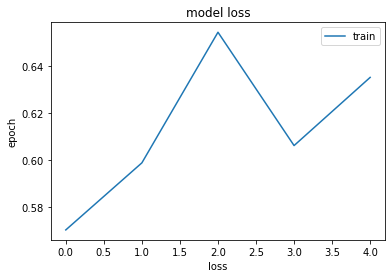

In [26]:
plt.plot(history1.history['accuracy'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [27]:
modelr1 = Sequential()
# Embedding layer
modelr1.add(Embedding(5000,64,input_length=100))
modelr1.add(SimpleRNN(32,activation='tanh'))
modelr1.add(Embedding(5000,32,input_length=100))
modelr1.add(SimpleRNN(32,activation='tanh' ))
modelr1.add(Dense('1',activation='sigmoid'))

In [28]:
modelr1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
modelr1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 embedding_2 (Embedding)     (None, 32, 32)            160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 485,217
Trainable params: 485,217
Non-trainable params: 0
_________________________________________________________________


In [30]:
history2 = modelr1.fit(train_padded,y_train,epochs=5,verbose=2,batch_size=15)

Epoch 1/5
2134/2134 - 9s - loss: 0.6934 - accuracy: 0.5029 - 9s/epoch - 4ms/step
Epoch 2/5
2134/2134 - 8s - loss: 0.6933 - accuracy: 0.5045 - 8s/epoch - 4ms/step
Epoch 3/5
2134/2134 - 9s - loss: 0.6932 - accuracy: 0.5046 - 9s/epoch - 4ms/step
Epoch 4/5
2134/2134 - 8s - loss: 0.6949 - accuracy: 0.5008 - 8s/epoch - 4ms/step
Epoch 5/5
2134/2134 - 9s - loss: 0.6942 - accuracy: 0.5045 - 9s/epoch - 4ms/step


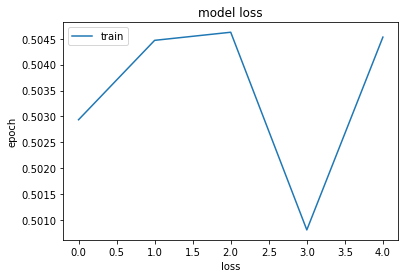

In [31]:
plt.plot(history2.history['accuracy'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

# `Model - CNN`

In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
# Train_data

train_datagen=ImageDataGenerator(rescale=0.2,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)

train_data = train_datagen.flow_from_directory(directory="Cars Dataset/train/")

Found 3352 images belonging to 7 classes.


In [34]:
train_data.class_indices

{'Audi': 0,
 'Hyundai Creta': 1,
 'Mahindra Scorpio': 2,
 'Rolls Royce': 3,
 'Swift': 4,
 'Tata Safari': 5,
 'Toyota Innova': 6}

In [35]:
# Model building

model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,3),kernel_size=(3,3),activation='relu'))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(1,activation='sigmoid'))

In [36]:
# Model Compile

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [39]:
model.fit(train_data,epochs=1)

105/105 [==============================] - 235s 2s/step - loss: 0.4208 - accuracy: 0.8571
